In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Union, Optional

aml_df = pd.read_parquet('../data/jp_morgan/sorted/transaction_metrics_final_aml_v3_cbflag.parquet')
frd_df = pd.read_parquet('../data/jp_morgan/sorted/transaction_metrics_final_fraud_v3_cbflag.parquet')

# Exploratory Data Analysis

## Seasonality

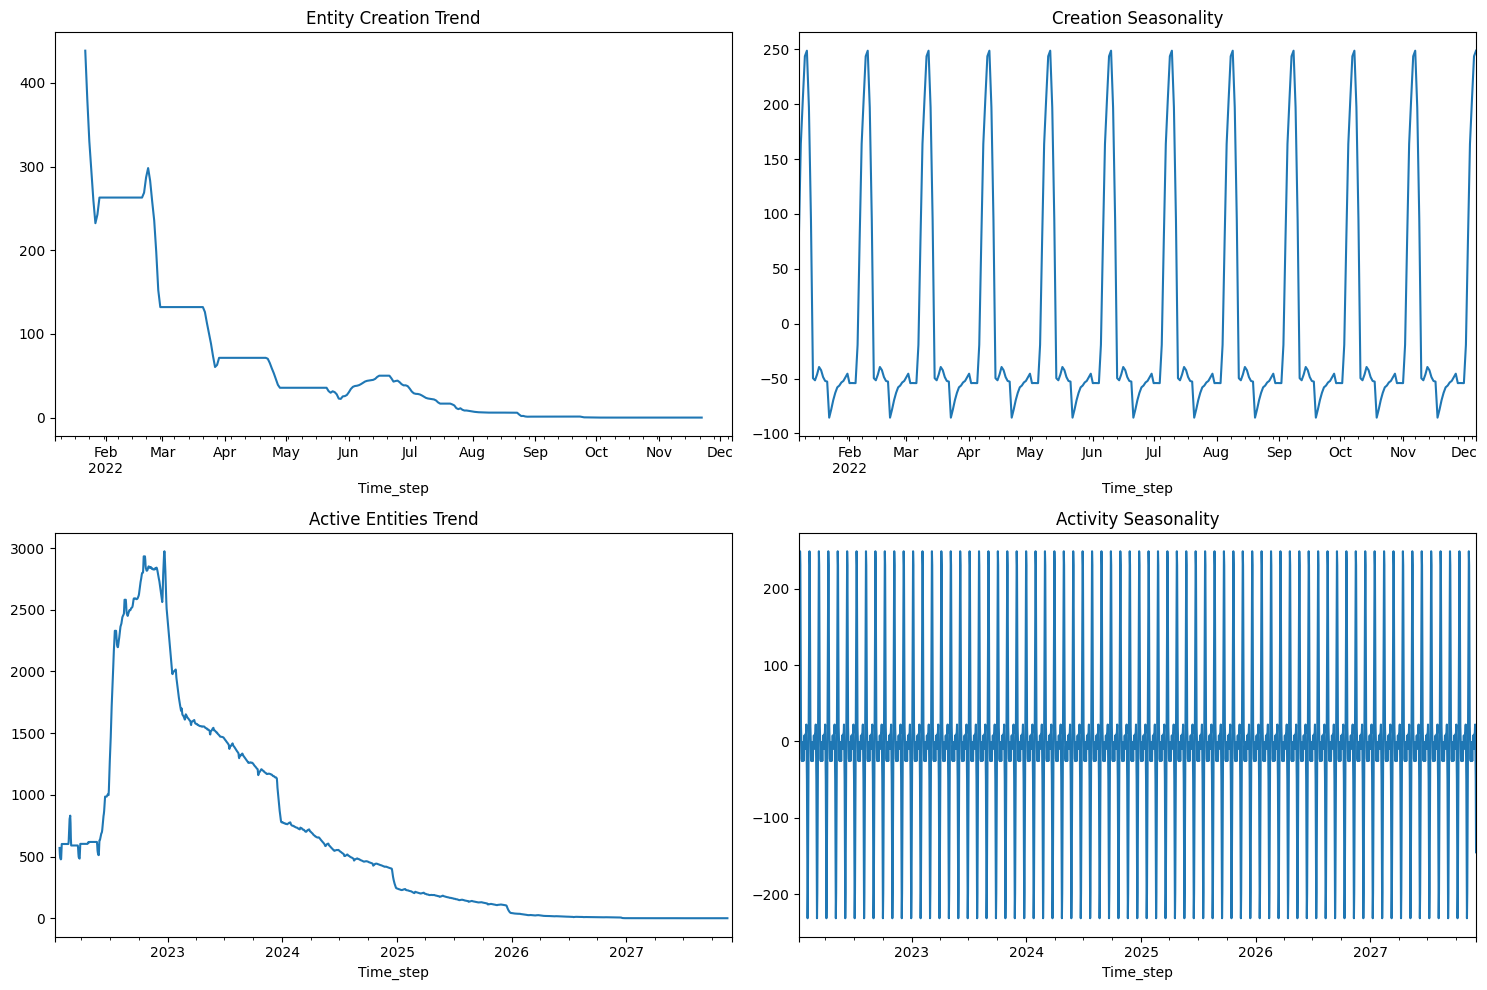

{'entity_data': {'creation': party_Id
  JPMC-CLIENT-1000023-06   2022-01-07 22:34:00
  JPMC-CLIENT-100008-06    2022-01-12 21:54:00
  JPMC-CLIENT-1000135-00   2022-01-10 06:47:00
  JPMC-CLIENT-1000185-04   2022-01-10 18:57:00
  JPMC-CLIENT-1000216-11   2022-01-08 23:40:00
                                   ...        
  JPMC-CLIENT-999620-04    2022-03-12 17:08:00
  JPMC-CLIENT-999655-00    2022-04-11 06:56:00
  JPMC-CLIENT-999793-11    2022-01-10 18:05:00
  JPMC-CLIENT-999834-05    2022-01-12 09:57:00
  JPMC-CLIENT-999898-10    2022-03-10 18:01:00
  Name: Time_step, Length: 31259, dtype: datetime64[ns],
  'last_active': party_Id
  JPMC-CLIENT-1000023-06   2022-10-08 09:29:00
  JPMC-CLIENT-100008-06    2023-12-10 13:28:00
  JPMC-CLIENT-1000135-00   2023-12-06 16:49:00
  JPMC-CLIENT-1000185-04   2022-11-27 01:42:00
  JPMC-CLIENT-1000216-11   2023-11-02 17:21:00
                                   ...        
  JPMC-CLIENT-999620-04    2023-11-06 21:41:00
  JPMC-CLIENT-999655-00    2022-1

In [15]:
def analyze_entity_seasonality(df: pd.DataFrame,
                            timestamp_col: str,
                            entity_col: str) -> dict:
    """
    Analyze entity seasonality patterns
    Tracks: creation dates, activity periods, transaction frequency
    """
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    # Entity metrics by time
    entity_data = {
        'creation': df.groupby(entity_col)[timestamp_col].min(),
        'last_active': df.groupby(entity_col)[timestamp_col].max(),
        'activity_dates': df.groupby(entity_col)[timestamp_col].agg(list)
    }

    # Daily patterns
    daily_patterns = {
        'creations': entity_data['creation'].value_counts().resample('D').sum(),
        'active_entities': df.set_index(timestamp_col).resample('D')[entity_col].nunique()
    }

    # Decompose both series
    decomp_creation = seasonal_decompose(daily_patterns['creations'].fillna(0), period=30)
    decomp_activity = seasonal_decompose(daily_patterns['active_entities'].fillna(0), period=30)

    return {
        'entity_data': entity_data,
        'daily_patterns': daily_patterns,
        'decomp_creation': decomp_creation,
        'decomp_activity': decomp_activity
    }

def analyze_entity_seasonality_with_viz(df: pd.DataFrame,
                            timestamp_col: str,
                            entity_col: str) -> dict:
    """
    Analyze and visualize entity seasonality patterns
    """
    # Get patterns
    patterns = analyze_entity_seasonality(df, timestamp_col, entity_col)

    # Visualize
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Creation patterns
    patterns['decomp_creation'].trend.plot(ax=axes[0,0], 
                                        title='Entity Creation Trend')
    patterns['decomp_creation'].seasonal.plot(ax=axes[0,1], 
                                           title='Creation Seasonality')

    # Activity patterns
    patterns['decomp_activity'].trend.plot(ax=axes[1,0], 
                                        title='Active Entities Trend')
    patterns['decomp_activity'].seasonal.plot(ax=axes[1,1], 
                                           title='Activity Seasonality')

    plt.tight_layout()
    plt.show()

    return patterns

analyze_entity_seasonality_with_viz(aml_df, timestamp_col='Time_step', entity_col='party_Id')

In [16]:
def get_entity_period_counts(df: pd.DataFrame,
                          timestamp_col: str,
                          entity_col: str) -> None:
   """
   Get entity counts for suggested training/test periods
   """
   entity_creation = df.groupby(entity_col)[timestamp_col].min()
   
   training = entity_creation[entity_creation < '2022-04-01']
   testing = entity_creation[entity_creation >= '2022-04-01']
   
   print(f"Training period (Jan-Mar 2022): {len(training)} entities")
   print(f"Testing period (Apr 2022+): {len(testing)} entities")
   print(f"Split ratio: {len(training)/(len(training)+len(testing)):.2%} training")

get_entity_period_counts(aml_df, timestamp_col='Time_step', entity_col='party_Id')

Training period (Jan-Mar 2022): 25813 entities
Testing period (Apr 2022+): 5446 entities
Split ratio: 82.58% training


In [ ]:
def entity_aggregate(df):
    df[]

In [6]:
aml_dts = decompose_timeseries(aml_df[['Time_step', 'USD_amount']], timestamp_col='Time_step', value_col='USD_amount')

C:\Users\al2-esplana\AppData\Local\Temp\ipykernel_27712\1442569545.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[timestamp_col] = pd.to_datetime(df[timestamp_col])


C:\Users\al2-esplana\AppData\Local\Temp\ipykernel_27712\1848237211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[timestamp_col] = pd.to_datetime(df[timestamp_col])
C:\Users\al2-esplana\AppData\Local\Temp\ipykernel_27712\1848237211.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[timestamp_col] = pd.to_datetime(df[timestamp_col])


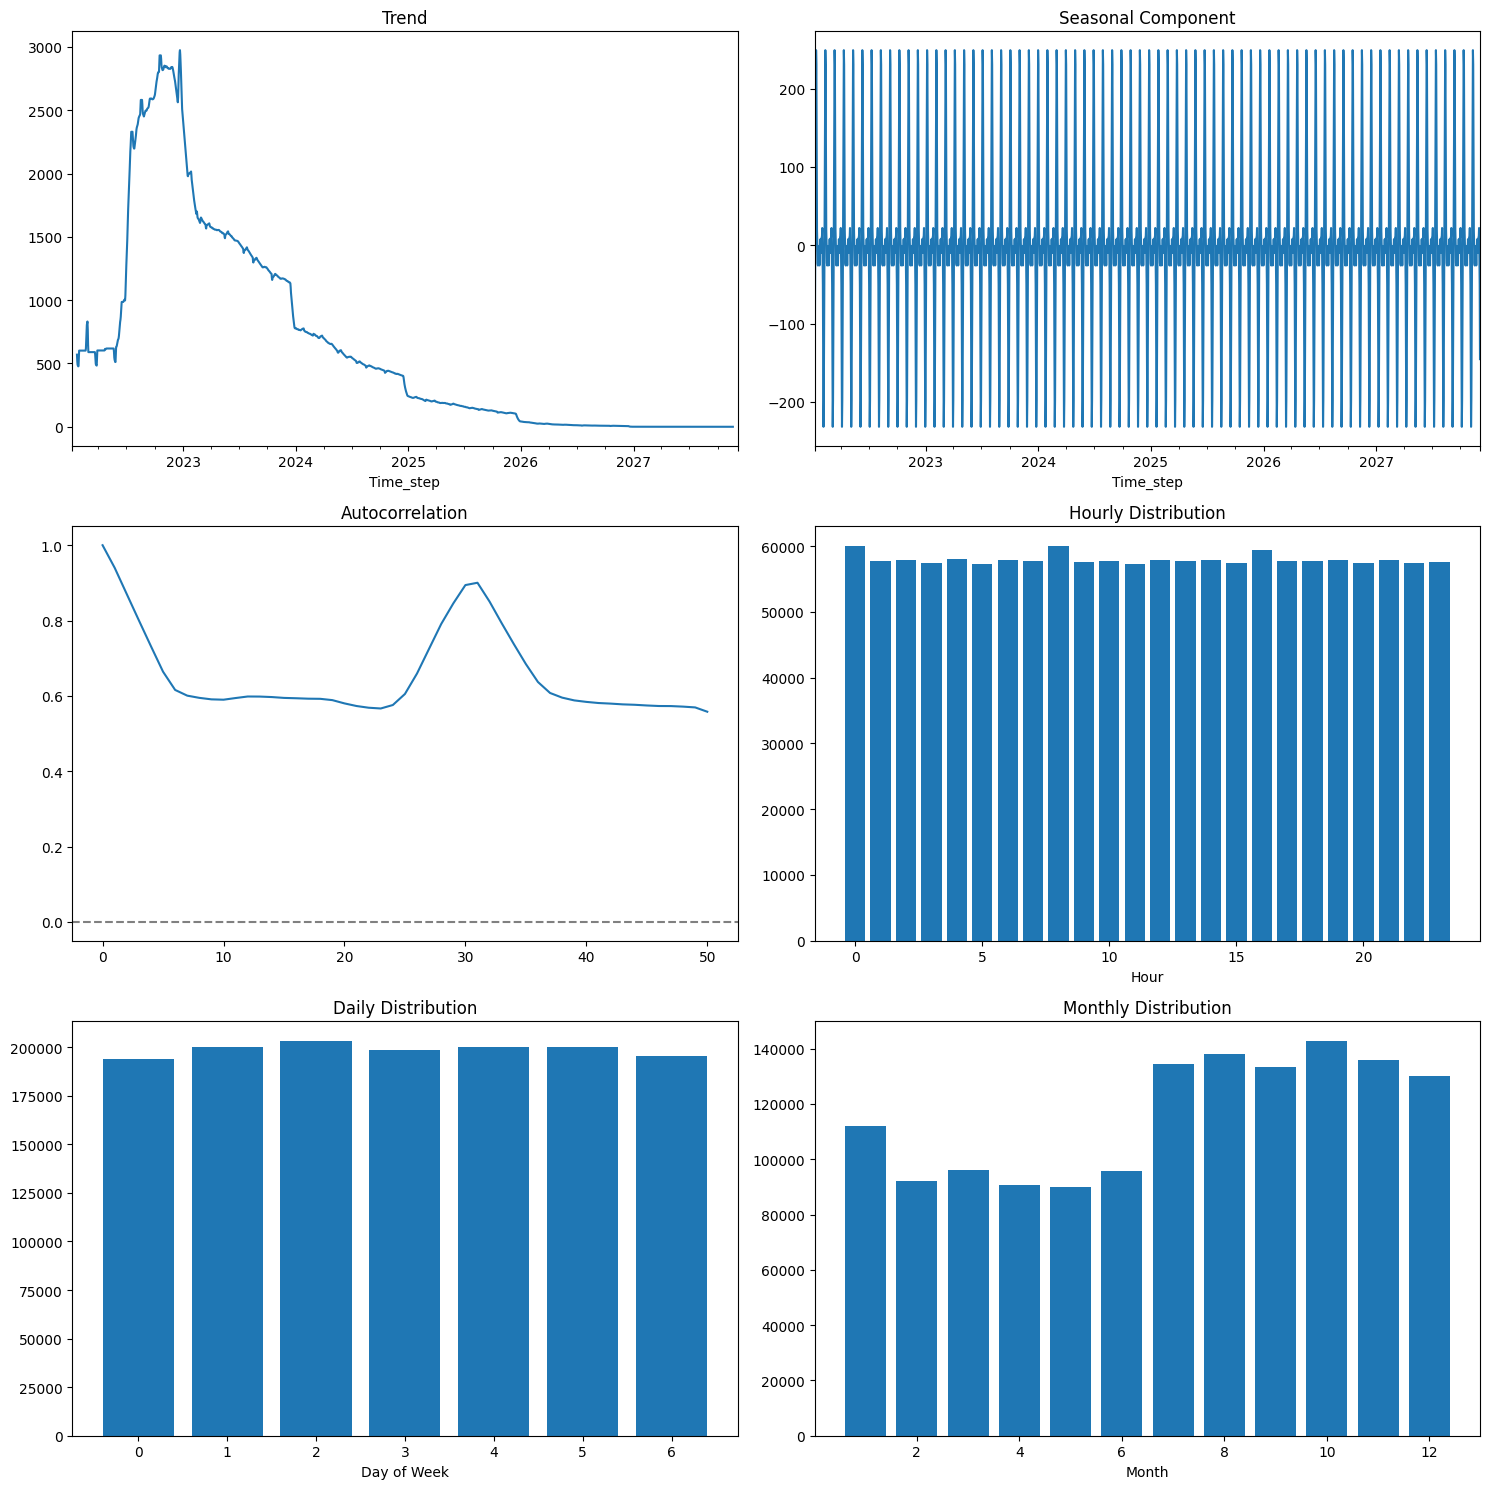

In [9]:
def visualize_temporal_patterns(df: pd.DataFrame, timestamp_col: str, value_col: str) -> None:
   """
   Comprehensive temporal visualization
   """
   # Setup
   fig, axes = plt.subplots(3, 2, figsize=(15, 15))
   
   # Time series decomposition
   df[timestamp_col] = pd.to_datetime(df[timestamp_col])
   ts = df.set_index(timestamp_col)[value_col].resample('D').count()
   decomp = seasonal_decompose(ts, period=30)
   
   decomp.trend.plot(ax=axes[0,0], title='Trend')
   decomp.seasonal.plot(ax=axes[0,1], title='Seasonal Component')
   
   # ACF 
   acf_vals = acf(ts.dropna(), nlags=50)
   axes[1,0].plot(range(len(acf_vals)), acf_vals)
   axes[1,0].set_title('Autocorrelation')
   axes[1,0].axhline(y=0, linestyle='--', color='gray')
   
   # Distribution plots
   df[timestamp_col] = pd.to_datetime(df[timestamp_col])
   
   # Hourly
   hourly = df[timestamp_col].dt.hour.value_counts().sort_index()
   axes[1,1].bar(hourly.index, hourly.values)
   axes[1,1].set_title('Hourly Distribution')
   axes[1,1].set_xlabel('Hour')
   
   # Daily
   daily = df[timestamp_col].dt.dayofweek.value_counts().sort_index()
   axes[2,0].bar(daily.index, daily.values)
   axes[2,0].set_title('Daily Distribution')
   axes[2,0].set_xlabel('Day of Week')
   
   # Monthly
   monthly = df[timestamp_col].dt.month.value_counts().sort_index()
   axes[2,1].bar(monthly.index, monthly.values)
   axes[2,1].set_title('Monthly Distribution')
   axes[2,1].set_xlabel('Month')
   
   plt.tight_layout()
   plt.show()

visualize_temporal_patterns(aml_df[['Time_step', 'USD_amount']], timestamp_col='Time_step', value_col='USD_amount')

C:\Users\al2-esplana\AppData\Local\Temp\ipykernel_27712\1848237211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[timestamp_col] = pd.to_datetime(df[timestamp_col])
C:\Users\al2-esplana\AppData\Local\Temp\ipykernel_27712\1848237211.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[timestamp_col] = pd.to_datetime(df[timestamp_col])


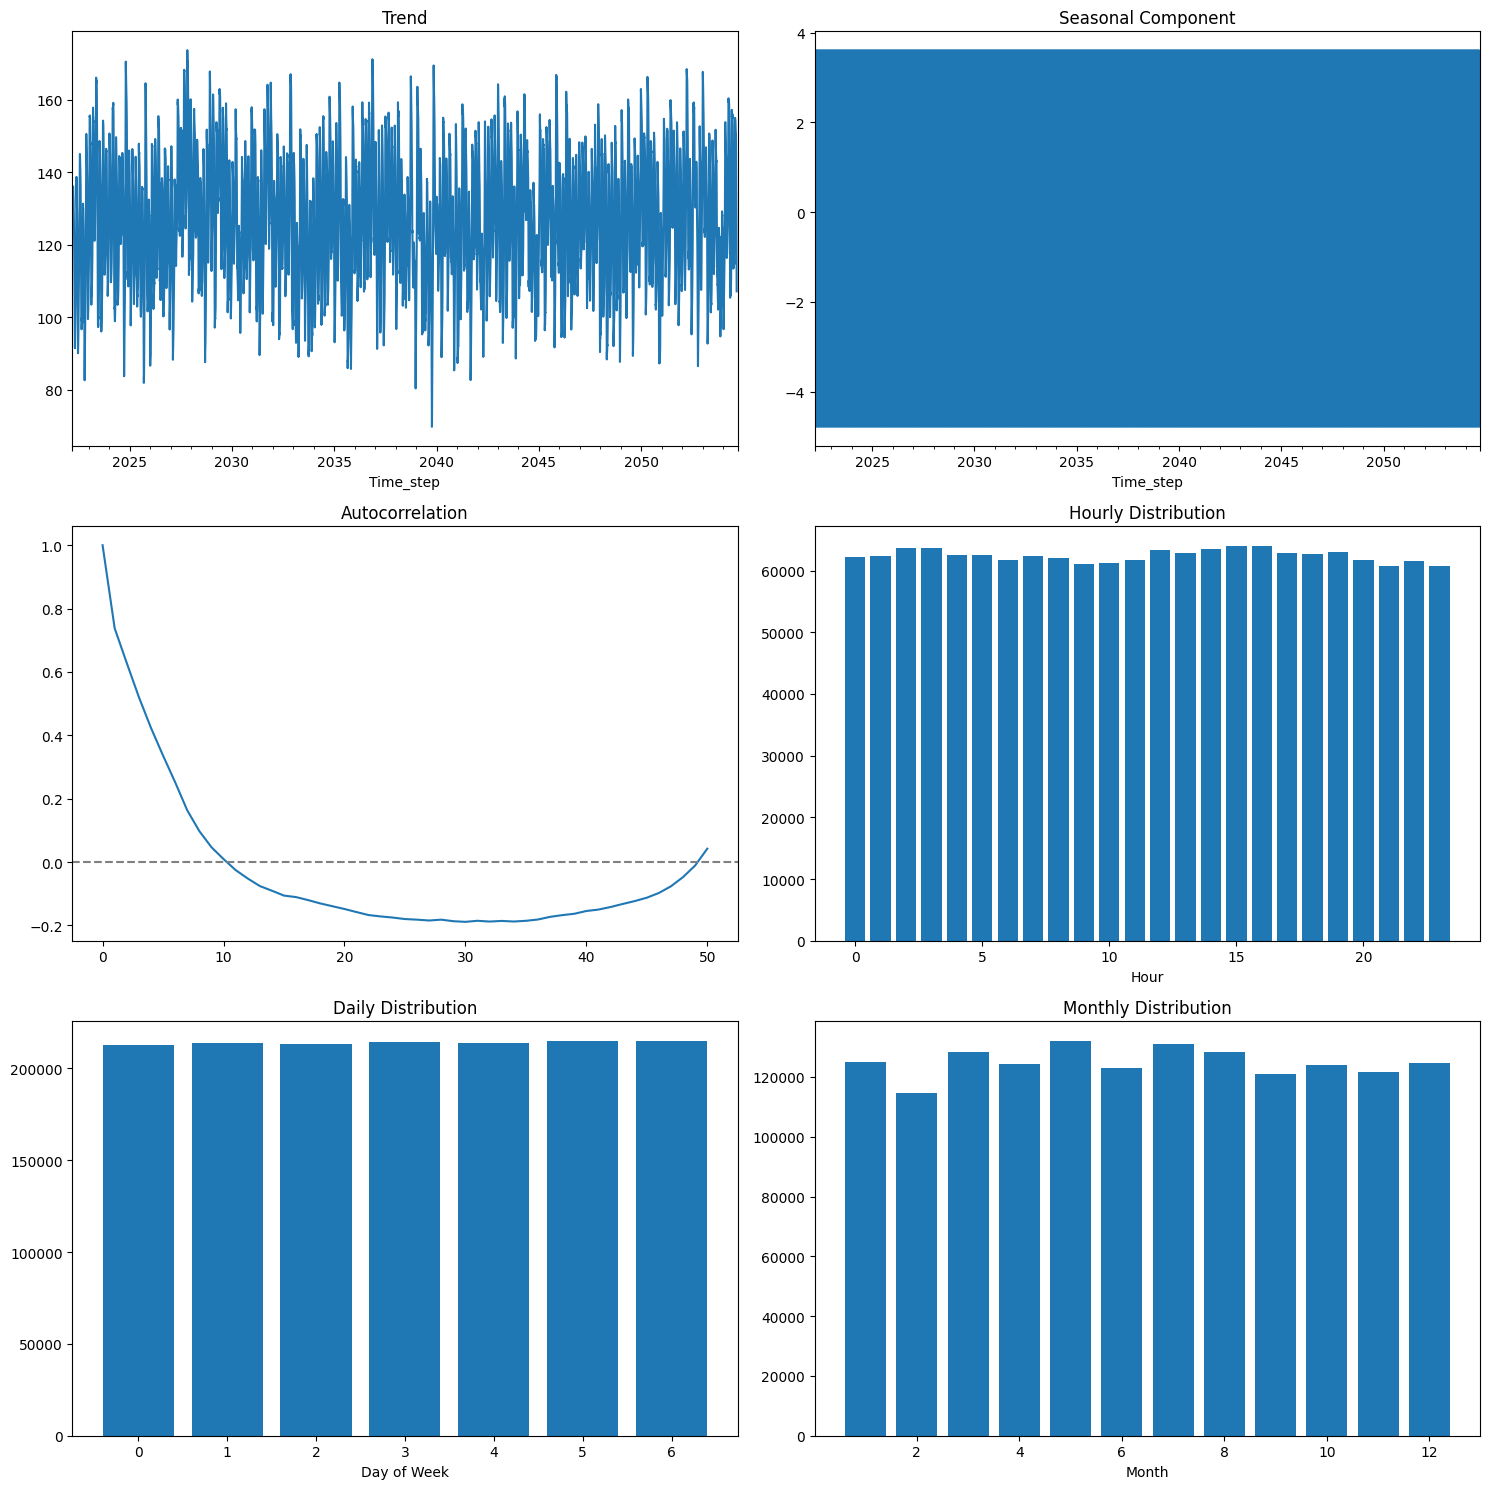

In [10]:
visualize_temporal_patterns(frd_df[['Time_step', 'USD_amount']], timestamp_col='Time_step', value_col='USD_amount')